✅ Data loaded for ML forecasting.
📊 MAE: 0.00 | R²: 1.000
💾 Model saved as sales_forecast_model.pkl


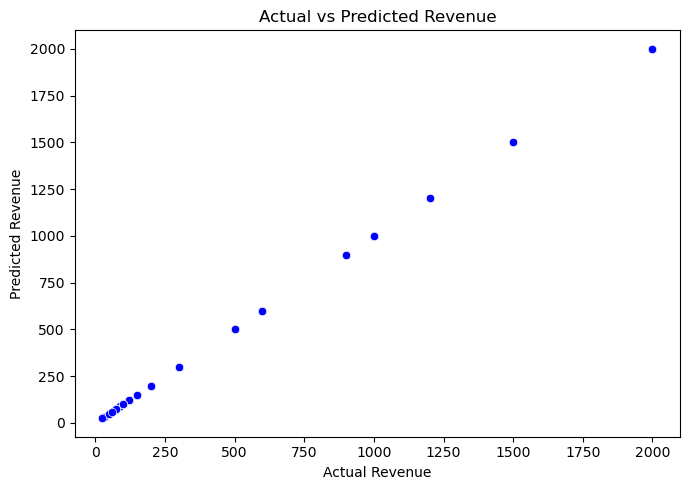

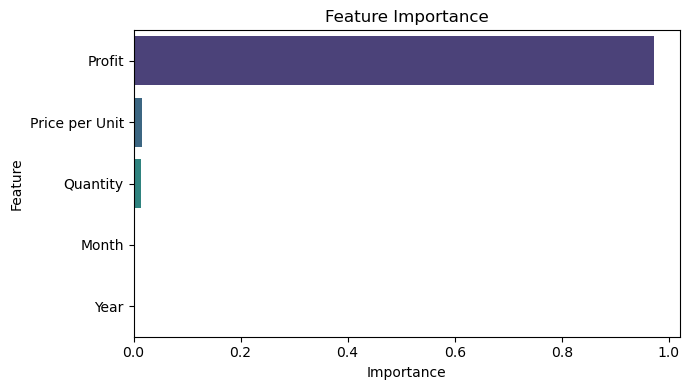

✅ Forecasting visualizations saved successfully!


In [7]:
# ---------------------------------------------------------
# Task 5: AI-Powered Retail Sales Forecasting Dashboard
# ---------------------------------------------------------

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score
import joblib

# 1️⃣ Load data
df = pd.read_csv("../Task3_DataTransformation/transformed_sales_data.csv")
print("✅ Data loaded for ML forecasting.")

# 2️⃣ Feature engineering
df["Date"] = pd.to_datetime(df["Date"], errors="coerce")
df["Month"] = df["Date"].dt.month
df["Year"] = df["Date"].dt.year

# Select useful columns
ml_df = df[["Month", "Year", "Quantity", "Price per Unit", "Revenue", "Profit"]].copy()

# 3️⃣ Train-test split
X = ml_df.drop("Revenue", axis=1)
y = ml_df["Revenue"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4️⃣ Model training
model = RandomForestRegressor(n_estimators=200, random_state=42)
model.fit(X_train, y_train)

# 5️⃣ Evaluation
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"📊 MAE: {mae:.2f} | R²: {r2:.3f}")

# 6️⃣ Save model
joblib.dump(model, "sales_forecast_model.pkl")
print("💾 Model saved as sales_forecast_model.pkl")

# 7️⃣ Visualize actual vs predicted
plt.figure(figsize=(7,5))
sns.scatterplot(x=y_test, y=y_pred, color="blue")
plt.xlabel("Actual Revenue")
plt.ylabel("Predicted Revenue")
plt.title("Actual vs Predicted Revenue")
plt.tight_layout()
plt.savefig("actual_vs_predicted.png")
plt.show()

# 8️⃣ Feature importance
importances = model.feature_importances_
features = X.columns
imp_df = pd.DataFrame({"Feature": features, "Importance": importances}).sort_values(by="Importance", ascending=False)

plt.figure(figsize=(7,4))
sns.barplot(data=imp_df, x="Importance", y="Feature", hue="Feature", palette="viridis", legend=False)
plt.title("Feature Importance")
plt.tight_layout()
plt.savefig("feature_importance.png")
plt.show()


print("✅ Forecasting visualizations saved successfully!")
